# Market Basket Analysis using Apriori Algorithm in Python

In [ ]:
# MIni Project BEFORE ANY PROJECT using MBA ,CHATGPT HELP for Basics Learning, Implementation, experiments 

In [28]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction dataset (1-hot encoded)
data = pd.DataFrame({
    'Bread':     [1, 0, 1, 1, 0],
    'Butter':    [1, 1, 1, 0, 0],
    'Milk':      [0, 1, 1, 1, 0],
    'Jam':       [0, 0, 1, 1, 1]
})

# Step 1: Find frequent itemsets
frequent_items = apriori(data, min_support=0.4, use_colnames=True)

# Step 2: Generate rules
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.6)

# Show results
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


      antecedents    consequents  support  confidence      lift
0         (Bread)       (Butter)      0.4    0.666667  1.111111
1        (Butter)        (Bread)      0.4    0.666667  1.111111
2         (Bread)         (Milk)      0.4    0.666667  1.111111
3          (Milk)        (Bread)      0.4    0.666667  1.111111
4         (Bread)          (Jam)      0.4    0.666667  1.111111
5           (Jam)        (Bread)      0.4    0.666667  1.111111
6          (Milk)       (Butter)      0.4    0.666667  1.111111
7        (Butter)         (Milk)      0.4    0.666667  1.111111
8           (Jam)         (Milk)      0.4    0.666667  1.111111
9          (Milk)          (Jam)      0.4    0.666667  1.111111
10  (Bread, Milk)          (Jam)      0.4    1.000000  1.666667
11   (Bread, Jam)         (Milk)      0.4    1.000000  1.666667
12    (Jam, Milk)        (Bread)      0.4    1.000000  1.666667
13        (Bread)    (Jam, Milk)      0.4    0.666667  1.666667
14         (Milk)   (Bread, Jam)      0.

C:\Users\hp\anaconda3\envs\pycaret-env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [42]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 2: Sample transaction data
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'jam'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['jam', 'butter']
]

# Step 3: Convert to transaction matrix (0/1 format)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.06, use_colnames=True)

# Step 5: Generate association rules (using lift ≥ 1)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Step 6: Filter rules where "milk" is in the antecedents-----------imp
milk_rules = rules[rules['antecedents'].apply(lambda x: 'milk' in x)]

# Step 7: Sort by lift (to find strongest associations)
milk_rules = milk_rules.sort_values(by='lift', ascending=False)

# Step 8: Show final rules
print("Top rules where milk is involved:\n")
print(milk_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top rules where milk is involved:

              antecedents           consequents   support  confidence  \
18            (jam, milk)       (bread, butter)  0.142857    1.000000   
23                 (milk)  (bread, jam, butter)  0.142857    0.250000   
6             (jam, milk)               (bread)  0.142857    1.000000   
8             (jam, milk)              (butter)  0.142857    1.000000   
11     (bread, jam, milk)              (butter)  0.142857    1.000000   
13    (milk, jam, butter)               (bread)  0.142857    1.000000   
5                  (milk)       (bread, butter)  0.285714    0.500000   
12  (bread, butter, milk)                 (jam)  0.142857    0.500000   
16          (bread, milk)         (jam, butter)  0.142857    0.333333   
19         (butter, milk)          (bread, jam)  0.142857    0.333333   
1                  (milk)               (bread)  0.428571    0.750000   
3                  (milk)              (butter)  0.428571    0.750000   

        lift  


In [46]:
# Example: change this to any product you want to analyze
product = 'bread'  # or 'butter', 'jam', etc.

# Filter rules where the product is in the antecedents
product_rules = rules[rules['antecedents'].apply(lambda x: product in x)]

# Sort by lift
product_rules = product_rules.sort_values(by='lift', ascending=False)

# Show top rules
print(f"Top rules where '{product}' is in the antecedents:\n")
print(product_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top rules where 'bread' is in the antecedents:

              antecedents          consequents   support  confidence      lift
15        (bread, butter)          (jam, milk)  0.142857    0.333333  2.333333
10   (bread, jam, butter)               (milk)  0.142857    1.000000  1.750000
7                 (bread)          (jam, milk)  0.142857    0.200000  1.400000
11     (bread, jam, milk)             (butter)  0.142857    1.000000  1.400000
20                (bread)  (milk, jam, butter)  0.142857    0.200000  1.400000
4         (bread, butter)               (milk)  0.285714    0.666667  1.166667
12  (bread, butter, milk)                (jam)  0.142857    0.500000  1.166667
14           (bread, jam)       (butter, milk)  0.142857    0.500000  1.166667
16          (bread, milk)        (jam, butter)  0.142857    0.333333  1.166667
0                 (bread)               (milk)  0.428571    0.600000  1.050000


In [50]:
# wrap into function
def get_product_rules(rules_df, product, top_n=5):
    filtered = rules_df[rules_df['antecedents'].apply(lambda x: product in x)]
    return filtered.sort_values(by='lift', ascending=False).head(top_n)


In [51]:
get_product_rules(rules, 'jam')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,"(jam, milk)","(bread, butter)",0.142857,0.428571,0.142857,1.0,2.333333,1.0,0.081633,inf,0.666667,0.333333,1.0,0.666667
10,"(bread, jam, butter)",(milk),0.142857,0.571429,0.142857,1.0,1.750000,1.0,0.061224,inf,0.500000,0.250000,1.0,0.625000
6,"(jam, milk)",(bread),0.142857,0.714286,0.142857,1.0,1.400000,1.0,0.040816,inf,0.333333,0.200000,1.0,0.600000
8,"(jam, milk)",(butter),0.142857,0.714286,0.142857,1.0,1.400000,1.0,0.040816,inf,0.333333,0.200000,1.0,0.600000
11,"(bread, jam, milk)",(butter),0.142857,0.714286,0.142857,1.0,1.400000,1.0,0.040816,inf,0.333333,0.200000,1.0,0.600000


# Third example

In [43]:
import pandas as pd

data = {
    'InvoiceNo': ['536365', '536366', 'C536367', None, '536368'],
    'Description': [' WHITE LAMP ', 'BLUE MUG', 'RED CUP', 'GREEN BOWL', '  YELLOW PLATE'],
    'Quantity': [6, 3, 1, 4, 2]
}

df = pd.DataFrame(data)
print(df)


  InvoiceNo     Description  Quantity
0    536365     WHITE LAMP          6
1    536366        BLUE MUG         3
2   C536367         RED CUP         1
3      None      GREEN BOWL         4
4    536368    YELLOW PLATE         2


In [45]:
# 1. Strip whitespace in 'Description'
df['Description'] = df['Description'].str.strip()

# 2. Drop rows with missing InvoiceNo
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# 3. Convert InvoiceNo to string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# 4. Remove canceled invoices (with 'C')
df = df[~df['InvoiceNo'].str.contains('C')]

df.drop_duplicates(inplace=True)   

print(df)


  InvoiceNo   Description  Quantity
0    536365    WHITE LAMP         6
1    536366      BLUE MUG         3
4    536368  YELLOW PLATE         2


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns  #error

In [11]:
import sys
print(sys.executable)


C:\Users\hp\anaconda3\envs\pycaret-env\python.exe


In [13]:
!"{sys.executable}" -m pip show seaborn

In [12]:
import seaborn as sns

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/GulzarAhmedButt/Market-Basket-Analysis/main/Groceries_dataset.csv"
df = pd.read_csv(url)

print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [14]:
x= df['itemDescription'].value_counts().sort_values(ascending=False)[:5]
x

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

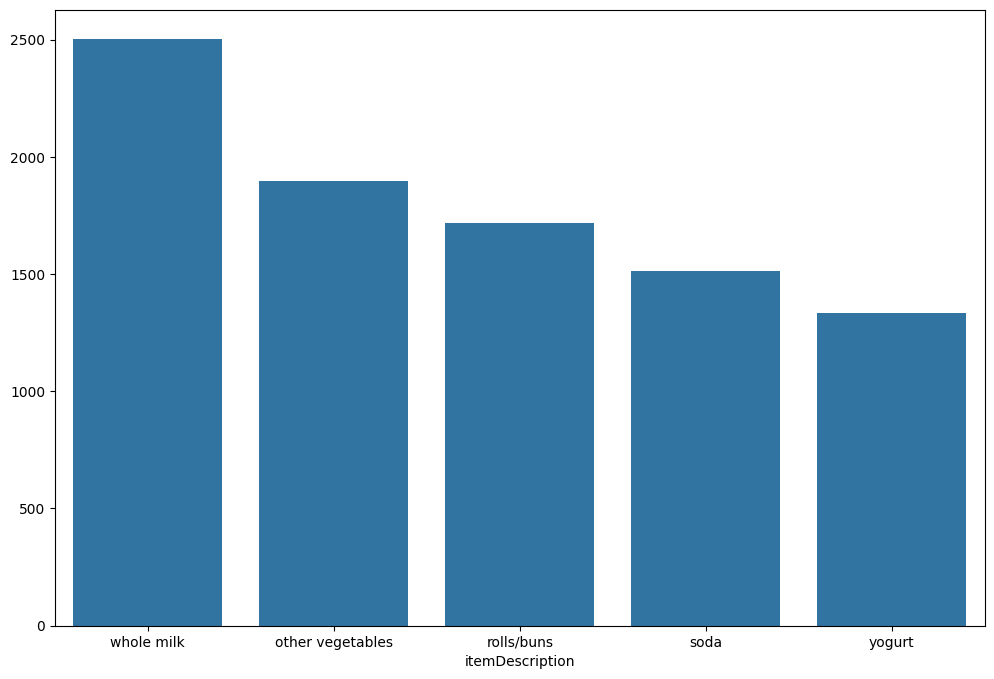

In [15]:
plt.figure(figsize=(12,8))
#sns.barplot(x.index,x.values)
sns.barplot(x=x.index, y=x.values)

In [17]:
from mlxtend.frequent_patterns import apriori,association_rules

In [18]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [19]:
df['Quantity'] = 1

In [20]:
df

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [21]:
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [30]:
transactions.head(2)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN


In [31]:
transactions = transactions.fillna(0)

In [32]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

C:\Users\hp\AppData\Local\Temp\ipykernel_7808\2387224811.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = transactions.applymap(encode)


In [ ]:
#basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [34]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(basket,min_support=0.06,use_colnames=True)# A
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1) # A, B 

C:\Users\hp\anaconda3\envs\pycaret-env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,1.0,0.007582,1.079240,0.142829,0.141705,0.073422,0.288950


In [41]:
rules[(rules['confidence']>0.55) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
130,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,1.0,0.014859,1.229837,0.212124,0.157017,0.186884,0.369306
136,"(other vegetables, soda)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,1.0,0.012375,1.225416,0.203992,0.135000,0.183951,0.354514
142,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,1.0,0.016704,1.344507,0.264348,0.141772,0.256233,0.376895
154,"(yogurt, rolls/buns)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,1.0,0.014917,1.328521,0.254605,0.130922,0.247283,0.368031


In [ ]:
'''
It starts with single items, then grows:
Step 1: Finds all items (e.g., "milk", "bread") that appear in at least 6% of transactions → called 1-itemsets.

Step 2: Then it combines them to form 2-itemsets (like "milk + bread"), but only if both milk and bread are already frequent.

Step 3: Then it tries 3-itemsets (like "milk + bread + butter"), but only if all subsets of that combo are frequent too.

❗ This is why it's called Apriori — it uses prior knowledge (frequent smaller sets) to build bigger ones.

Apriori starts with one item, then finds combinations.

You don’t need to manually start with one item unless you want to analyze rules related to that item.

After generating rules, you can filter and target any item using conditions.'''

In [8]:
import pandas as pd
import sidetable as std

In [9]:
url = "https://raw.githubusercontent.com/GulzarAhmedButt/Market-Basket-Analysis/main/Groceries_dataset.csv"
df = pd.read_csv(url)

print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [10]:
df['itemDescription'].value_counts().head(2)

itemDescription
whole milk          2502
other vegetables    1898
Name: count, dtype: int64

In [12]:
df.stb.freq(['itemDescription']).head(5)

,itemDescription,count,percent,cumulative_count,cumulative_percent
0,whole milk,2502,6.454276,2502,6.454276
1,other vegetables,1898,4.896169,4400,11.350445
2,rolls/buns,1716,4.426674,6116,15.777119
3,soda,1514,3.905585,7630,19.682703
4,yogurt,1334,3.441249,8964,23.123952


In [ ]:
'''What if we want a quick view of the item description that contribute around 50% of the total?
Use the thresh argument to group all of the rest into an “Others” category:'''

In [16]:
df.stb.freq(['itemDescription'], thresh=50)

,itemDescription,count,percent,cumulative_count,cumulative_percent
0,whole milk,2502,6.454276,2502,6.454276
1,other vegetables,1898,4.896169,4400,11.350445
2,rolls/buns,1716,4.426674,6116,15.777119
3,soda,1514,3.905585,7630,19.682703
4,yogurt,1334,3.441249,8964,23.123952
5,root vegetables,1071,2.762801,10035,25.886754
6,tropical fruit,1032,2.662195,11067,28.548949
7,bottled water,933,2.406810,12000,30.955759
8,sausage,924,2.383593,12924,33.339353
9,citrus fruit,812,2.094673,13736,35.434026


### INSIGHTS : 17 items contributed almost 50% of the total and all the other items account for the remainder.

In [ ]:
#df.stb.freq(['State'], thresh=50, other_label='Rest of states')

In [ ]:
'''## One of the useful features of sidetable is that it can group columns together to further understand the distribution. For instance,
what if we want to see how the various “Transformation Models” are applied across Regions?'''

In [18]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [26]:
#df.stb.freq(['Member_number', 'itemDescription'])
#df.stb.freq(['Member_number', 'itemDescription']).sort_values(by='count', ascending=True).head(6)
df.stb.freq(['itemDescription']).sort_values(by='count', ascending=False).head(5)

,itemDescription,count,percent,cumulative_count,cumulative_percent
0,whole milk,2502,6.454276,2502,6.454276
1,other vegetables,1898,4.896169,4400,11.350445
2,rolls/buns,1716,4.426674,6116,15.777119
3,soda,1514,3.905585,7630,19.682703
4,yogurt,1334,3.441249,8964,23.123952


In [ ]:
# most commonly bought items across all customers.

In [27]:
#Analyze loyal purchases:

df.groupby(['Member_number', 'itemDescription']).size().reset_index(name='count') \
  .query('count > 1').sort_values(by='count', ascending=False)

,Member_number,itemDescription,count
12065,2390,other vegetables,6
22322,3582,whole milk,5
16170,2861,whole milk,5
33694,4864,whole milk,5
3136,1363,whole milk,5
...,...,...,...
12516,2440,bottled beer,2
12520,2440,domestic eggs,2
12539,2441,canned beer,2
12557,2443,pastry,2
